# 4-Bedroom Housing Price Analysis around Miami Fl
### Coursera-capstone-project

## I. Description of the Project
### 1. Introduction:
Real estate housing price changes over time and in different places near Miami, Fl. As an investor looking for buying family size (4-Bedroom) house as an investiment. Catching opportunities in areas where current market housing price is lower than where it should be is important for profitability. It is critical to have a data driven model that can predict market value for a neighborhood.

The question is what aspects of a neighborhood can affect the price of real estates? One hypothesis is that the surrounding venues can be a decision factor. This work is trying to analyze the impact of venues in a neighborhood affecting its value

### 2. The question to solve:
This project will try to explore the neighborhoods of Miami, Fl area to see:
- What venues affect the price of real estates?
- Can we use the surrounding venue to estimate the value of a 4-bedroom house median price of one area? 
- what accuracy is the model?
The result can be useful for home buyers and investors for predicting the value of a target house over the average.

## II. Description of the data
The main data used for this project will be from two sources:

The average price by neighborhoods in US. (https://www.zillow.com/research/data/)
The venues in each neighborhood. (FourSquare API)
Other supporting data:

Coordinates (Geocoder Python)

**Note: This project will only consider the average price of 4-bedrooms houses, which is a common type of real estate among normal families.**

### 1. Data collection process:
The average price will be downloaded from the zillow website. The data is a smoothed, seasonally adjusted measure of the median estimated home value across a given region and housing type. It is a dollar-denominated alternative to repeat-sales indices.

- For each neighborhood, call Geocoder Python to get its coordinate.
- For each neighborhood's coordinate, call FourSquare API to get the surrounding venues.
- Count the occurrences of each venue type and attach that information to each neighborhood.

The output of the data collecting process will be a 2 dimensions dataframe:
- Each row represents a neighborhood.
- Each column will be the count of one type of venue in that neighborhood.
- 1 column will be the median price of that neighborhood in 2019-09.

### 2. Using data to solve the question:
- correlation between price and surrounding venues will be checked.
- if correlation coefficient meets a threshold, machine learning techniques will be used to analyze the data. 
The output will be a list of venues types that effect the most on price, along with their weight on the result.

## III Description of Methodology

### 1. Import all libraries

In [1]:
# install web scrap, geocoder and map visualization library
#!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

#from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# we are using the inline backend
%matplotlib inline 

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use(['ggplot']) # optional: for ggplot-like style

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import preprocessing

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

### Part 1: Retrieve neighborhood data from website

download ZHVI 4-bedroom time series ($) data from https://www.zillow.com/research/data/

In [3]:
# The code was removed by Watson Studio for sharing.

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,381400.0,382000.0,382400.0,382700.0,382900.0,383000.0,383200.0,383400.0,384100.0,385300.0,386400.0,387200.0,388200.0,389500.0,391100.0,393100.0,395500.0,398400.0,401900.0,405900.0,411000.0,416900.0,422900.0,428900.0,435400.0,442100.0,449100.0,456100.0,463200.0,470300.0,477300.0,484200.0,491600.0,499100.0,506100.0,512500.0,518900.0,525200.0,531400.0,537700.0,544000.0,550500.0,557200.0,564300.0,572100.0,580600.0,589000.0,597000.0,605100.0,613100.0,621000.0,628800.0,636400.0,643800.0,651200.0,658600.0,666100.0,673700.0,681000.0,687900.0,694500.0,700700.0,706500.0,712000.0,717200.0,722300.0,727400.0,732500.0,737700.0,743000.0,748400.0,753700.0,758800.0,763400.0,767800.0,771900.0,775900.0,779900.0,784100.0,788600.0,792700.0,795300.0,796600.0,797600.0,798000.0,798300.0,799000.0,800500.0,802600.0,805400.0,808800.0,812800.0,817400.0,822400.0,827700.0,833400.0,839700.0,846800.0,854400.0,861600.0,867800.0,873100.0,878100.0,882600.0,887400.0,892600.0,897900.0,903700.0,910100.0,916500.0,923400.0,930900.0,938600.0,945900.0,952100.0,956900.0,960300.0,963000.0,966000.0,970300.0,975600.0,980000.0,983100.0,985000.0,986100.0,986800.0,987900.0,989200.0,990700.0,992300.0,993000.0,993100.0,992200.0,989300.0,984900.0,980700.0,977700.0,976600.0,977100.0,977100.0,974900.0,971000.0,966100.0,961100.0,955800.0,948500.0,939400.0,929800.0,920600.0,913000.0,908000.0,903500.0,898000.0,892500.0,887000.0,880800.0,873200.0,863200.0,852300.0,843900.0,838300.0,834600.0,833000.0,832100.0,831300.0,831800.0,834500.0,830200.0,820500.0,816800.0,818300.0,815300.0,810500.0,806200.0,799000.0,792000.0,786400.0,785500.0,786100.0,784500.0,78

In [4]:
# change column names and remove not useful column
df_data_0.rename(columns={"RegionName": "PostalCode", "Metro": "Neighborhood","CountyName": "Borough"},inplace=True)
df_data_0.drop(['SizeRank','RegionID'], axis=1, inplace=True)
df_data_0.head()

,PostalCode,City,State,Neighborhood,Borough,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,381400.0,382000.0,382400.0,382700.0,382900.0,383000.0,383200.0,383400.0,384100.0,385300.0,386400.0,387200.0,388200.0,389500.0,391100.0,393100.0,395500.0,398400.0,401900.0,405900.0,411000.0,416900.0,422900.0,428900.0,435400.0,442100.0,449100.0,456100.0,463200.0,470300.0,477300.0,484200.0,491600.0,499100.0,506100.0,512500.0,518900.0,525200.0,531400.0,537700.0,544000.0,550500.0,557200.0,564300.0,572100.0,580600.0,589000.0,597000.0,605100.0,613100.0,621000.0,628800.0,636400.0,643800.0,651200.0,658600.0,666100.0,673700.0,681000.0,687900.0,694500.0,700700.0,706500.0,712000.0,717200.0,722300.0,727400.0,732500.0,737700.0,743000.0,748400.0,753700.0,758800.0,763400.0,767800.0,771900.0,775900.0,779900.0,784100.0,788600.0,792700.0,795300.0,796600.0,797600.0,798000.0,798300.0,799000.0,800500.0,802600.0,805400.0,808800.0,812800.0,817400.0,822400.0,827700.0,833400.0,839700.0,846800.0,854400.0,861600.0,867800.0,873100.0,878100.0,882600.0,887400.0,892600.0,897900.0,903700.0,910100.0,916500.0,923400.0,930900.0,938600.0,945900.0,952100.0,956900.0,960300.0,963000.0,966000.0,970300.0,975600.0,980000.0,983100.0,985000.0,986100.0,986800.0,987900.0,989200.0,990700.0,992300.0,993000.0,993100.0,992200.0,989300.0,984900.0,980700.0,977700.0,976600.0,977100.0,977100.0,974900.0,971000.0,966100.0,961100.0,955800.0,948500.0,939400.0,929800.0,920600.0,913000.0,908000.0,903500.0,898000.0,892500.0,887000.0,880800.0,873200.0,863200.0,852300.0,843900.0,838300.0,834600.0,833000.0,832100.0,831300.0,831800.0,834500.0,830200.0,820500.0,816800.0,818300.0,815300.0,810500.0,806200.0,799000.0,792000.0,786400.0,785500.0,786100.0,784500.0,782100.0,782600.0,783200

In [5]:
# filter data for miami fl area
print ('orignal dataset size: ', df_data_0.shape)
df_data_0 = df_data_0.dropna() # drop rows with NaN value

df_miami_price = df_data_0[df_data_0['Neighborhood'].str.contains("Miami") & df_data_0['State'].str.contains('FL')].reset_index(drop=True)
print('new dataset size: ', df_miami_price.shape)
df_miami_price.head()

orignal dataset size:  (9597, 287)
new dataset size:  (158, 287)


,PostalCode,City,State,Neighborhood,Borough,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,738000.0,740200.0,742200.0,744300.0,746300.0,748400.0,750500.0,752400.0,754700.0,757300.0,759300.0,760400.0,761100.0,761500.0,761600.0,761500.0,761500.0,761600.0,761700.0,761700.0,762000.0,762800.0,763300.0,762900.0,762300.0,761400.0,760400.0,759600.0,759000.0,758700.0,758700.0,758700.0,759200.0,760400.0,761500.0,762000.0,762400.0,762700.0,763200.0,764000.0,765200.0,767100.0,769600.0,772400.0,775900.0,780300.0,784900.0,789100.0,793400.0,797500.0,801800.0,806500.0,811700.0,817400.0,823700.0,830100.0,837200.0,844800.0,852700.0,860300.0,867600.0,874600.0,881300.0,888300.0,895600.0,903400.0,911500.0,919600.0,928200.0,937300.0,946700.0,955700.0,964200.0,971900.0,979300.0,986800.0,994800.0,1003200.0,1011700.0,1021700.0,1032700.0,1042600.0,1051500.0,1061800.0,1073500.0,1086000.0,1097900.0,1106400.0,1109100.0,1105300.0,1097200.0,1088100.0,1082100.0,1081400.0,1085800.0,1094300.0,1106300.0,1120600.0,1136200.0,1153600.0,1174800.0,1202600.0,1237400.0,1276400.0,1316000.0,1351800.0,1380500.0,1402100.0,1418800.0,1432900.0,1447400.0,1463000.0,1478100.0,1490900.0,1500900.0,1507900.0,1512600.0,1515300.0,1515900.0,1516800.0,1520800.0,1527800.0,1535700.0,1542400.0,1546400.0,1547600.0,1546300.0,1542500.0,1539300.0,1538900.0,1540300.0,1541900.0,1542900.0,1542000.0,1540900.0,1540700.0,1538700.0,1533700.0,1525200.0,1511500.0,1492900.0,1472200.0,1448500.0,1421500.0,1391300.0,1358500.0,1327700.0,1302300.0,1278700.0,1254500.0,1230000.0,1204500.0,1180700.0,1161200.0,1142300.0,1120900.0,1096900.0,1069200.0,1045100.0,1033000.0,1031000.0,1034700.0,1041700.0,1047800.0,1054100.0,1061500.0,1066400.0,1067100.0,1072200.0,10

In [6]:
# group neighbors with same postal code and borough into a single row
foo = lambda a: ",".join(a) # create custom aggregator
df_miami_grouped = df_miami_price.groupby(['PostalCode','Borough']).agg({'Neighborhood': foo}).reset_index()
df_miami_grouped = pd.merge(df_miami_grouped, df_miami_price, how='left', left_on=['PostalCode'], right_on = ['PostalCode'])
df_miami_grouped.drop(['Neighborhood_y','Borough_y'],axis=1, inplace=True)
df_miami_grouped.rename(columns={"Neighborhood_x": "Neighborhood", "Borough_x": "Borough"},inplace=True)

print (df_miami_grouped.shape)
df_miami_grouped.head()

(158, 287)


,PostalCode,Borough,Neighborhood,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,33010,Miami-Dade County,Miami-Fort Lauderdale-West Palm Beach,Hialeah,FL,115400.0,115800.0,116300.0,116600.0,117000.0,117400.0,117700.0,118100.0,118700.0,119300.0,119700.0,120000.0,120300.0,120600.0,120900.0,121100.0,121300.0,121600.0,121800.0,122100.0,122600.0,123100.0,123500.0,123800.0,124100.0,124400.0,124800.0,125200.0,125600.0,125900.0,126400.0,127000.0,127700.0,128500.0,129200.0,129700.0,130300.0,130900.0,131500.0,132100.0,132700.0,133300.0,134000.0,134700.0,135600.0,136500.0,137300.0,138000.0,138700.0,139400.0,140100.0,140800.0,141600.0,142400.0,143300.0,144300.0,145400.0,146700.0,147800.0,149000.0,150200.0,151300.0,152500.0,153800.0,155100.0,156300.0,157700.0,159300.0,161000.0,162600.0,164300.0,165800.0,167300.0,168800.0,170200.0,171600.0,172900.0,174300.0,175800.0,177100.0,178500.0,180300.0,182400.0,184600.0,186600.0,188600.0,190500.0,192300.0,194100.0,196000.0,197800.0,199900.0,202300.0,205000.0,208000.0,211300.0,214900.0,218700.0,222600.0,226700.0,231100.0,235700.0,240400.0,245200.0,250000.0,254600.0,258700.0,262900.0,267400.0,272100.0,277100.0,282400.0,287700.0,292500.0,296700.0,300400.0,304000.0,307600.0,311300.0,315800.0,320700.0,325300.0,329600.0,334400.0,339300.0,343600.0,347000.0,349800.0,352400.0,355000.0,357000.0,358900.0,360300.0,360600.0,360300.0,360300.0,360100.0,358800.0,356300.0,352500.0,347700.0,342300.0,336400.0,330900.0,325800.0,320400.0,314500.0,306700.0,295500.0,282200.0,268800.0,255300.0,242200.0,230300.0,218900.0,207500.0,195600.0,183000.0,170800.0,161300.0,154800.0,150500.0,148000.0,146600.0,146100.0,146300.0,147400.0,145900.0,143500.0,143900.0,145800.0,145000.0,143400.0,141800.0,140100.0,138500.0,136500.0,133500.0,130900.0,130200.0,13100

### Part 2 explore data and visualize the info
use statistic functions to see dataset info
use visualization tools to visualize dataset info

In [7]:
# useful for plotting later on
df_miami_grouped.columns = list(map(str, df_miami_grouped.columns))
years = list(df_miami_grouped.columns)[5:]
#years

In [8]:
# check the data type of data frame
df_years = df_miami_grouped[years].astype('float64')

df1 = df_miami_grouped.drop(years,axis=1).astype('str')
df_miami_grouped = df1.join(df_years,how='inner')
#df_miami_grouped.head()
#print(df_miami_grouped.dtypes)

In [9]:
# summary of column statistics
print ("dataset info: ", df_miami_grouped.info())
print(df_miami_grouped.describe(include = "object"))
df_miami_grouped[years].describe(include = 'float64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Columns: 287 entries, PostalCode to 2019-09
dtypes: float64(282), object(5)
memory usage: 360.5+ KB
dataset info:  None
       PostalCode            Borough                           Neighborhood  \
count         158                158                                    158   
unique        158                  3                                      1   
top         33411  Miami-Dade County  Miami-Fort Lauderdale-West Palm Beach   
freq            1                 62                                    158   

         City State  
count     158   158  
unique     72     1  
top     Miami    FL  
freq       10   158  


,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.

In [10]:
# summarize house price per month
mean_yr = df_miami_grouped[years].mean()
max_yr = df_miami_grouped[years].max()
min_yr = df_miami_grouped[years].min()
stat_yr = pd.concat([mean_yr, max_yr, min_yr], axis=1)
stat_yr.rename(columns={0:"mean", 1:"max", 2:"min"},inplace=True)
stat_yr.head()

,mean,max,min
1996-04,203671.518987,822500.0,73200.0
1996-05,203836.708861,821000.0,73200.0
1996-06,203975.949367,819700.0,73100.0
1996-07,204108.860759,818500.0,73100.0
1996-08,204242.405063,817500.0,73000.0


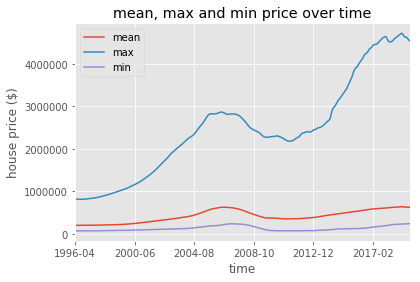

In [11]:
# visualize house price over time
stat_yr.plot(kind='line')

plt.title('mean, max and min price over time')
plt.ylabel('house price ($)')
plt.xlabel('time')

plt.show() 

In [12]:
# summarize house price in each borough for each month
df_borough = pd.DataFrame(df_miami_grouped['Borough']).join(df_miami_grouped[years],how='inner')
df_borough_grouped = df_borough.groupby(['Borough']).agg('mean').transpose()
df_borough_grouped.head()

Borough,Broward County,Miami-Dade County,Palm Beach County
1996-04,185018.367347,201927.419355,225419.148936
1996-05,184979.591837,202150.000000,225721.276596
1996-06,184922.448980,202341.935484,225995.744681
1996-07,184848.979592,202517.741935,226287.234043
1996-08,184802.040816,202677.419355,226574.468085


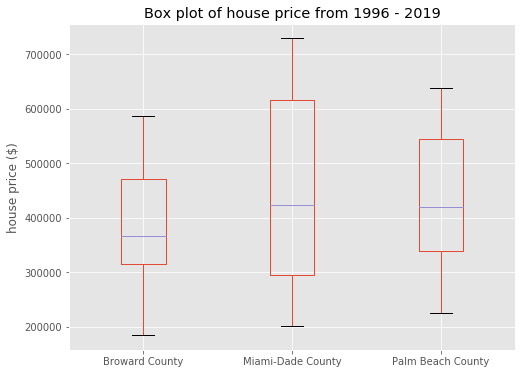

In [13]:
# visualize house price in borough
df_borough_grouped.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of house price from 1996 - 2019')
plt.ylabel('house price ($)')

plt.show()

### Part 3 retrieve geo-coordinates and visualize data

In [14]:
# filter for unique city name by keep first duplicate value
df_miami_unique = df_miami_grouped.drop_duplicates(subset=['City'])
print(df_miami_unique.shape)
df_miami_unique.head()

(72, 287)


,PostalCode,Borough,Neighborhood,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,33010,Miami-Dade County,Miami-Fort Lauderdale-West Palm Beach,Hialeah,FL,115400.0,115800.0,116300.0,116600.0,117000.0,117400.0,117700.0,118100.0,118700.0,119300.0,119700.0,120000.0,120300.0,120600.0,120900.0,121100.0,121300.0,121600.0,121800.0,122100.0,122600.0,123100.0,123500.0,123800.0,124100.0,124400.0,124800.0,125200.0,125600.0,125900.0,126400.0,127000.0,127700.0,128500.0,129200.0,129700.0,130300.0,130900.0,131500.0,132100.0,132700.0,133300.0,134000.0,134700.0,135600.0,136500.0,137300.0,138000.0,138700.0,139400.0,140100.0,140800.0,141600.0,142400.0,143300.0,144300.0,145400.0,146700.0,147800.0,149000.0,150200.0,151300.0,152500.0,153800.0,155100.0,156300.0,157700.0,159300.0,161000.0,162600.0,164300.0,165800.0,167300.0,168800.0,170200.0,171600.0,172900.0,174300.0,175800.0,177100.0,178500.0,180300.0,182400.0,184600.0,186600.0,188600.0,190500.0,192300.0,194100.0,196000.0,197800.0,199900.0,202300.0,205000.0,208000.0,211300.0,214900.0,218700.0,222600.0,226700.0,231100.0,235700.0,240400.0,245200.0,250000.0,254600.0,258700.0,262900.0,267400.0,272100.0,277100.0,282400.0,287700.0,292500.0,296700.0,300400.0,304000.0,307600.0,311300.0,315800.0,320700.0,325300.0,329600.0,334400.0,339300.0,343600.0,347000.0,349800.0,352400.0,355000.0,357000.0,358900.0,360300.0,360600.0,360300.0,360300.0,360100.0,358800.0,356300.0,352500.0,347700.0,342300.0,336400.0,330900.0,325800.0,320400.0,314500.0,306700.0,295500.0,282200.0,268800.0,255300.0,242200.0,230300.0,218900.0,207500.0,195600.0,183000.0,170800.0,161300.0,154800.0,150500.0,148000.0,146600.0,146100.0,146300.0,147400.0,145900.0,143500.0,143900.0,145800.0,145000.0,143400.0,141800.0,140100.0,138500.0,136500.0,133500.0,130900.0,130200.0,13100

In [15]:
# generate address column by concat City and State
df_miami_unique['Address'] = df_miami_unique['City']+','+df_miami_unique['State']
df_miami_unique.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PostalCode,Borough,Neighborhood,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,Address
0,33010,Miami-Dade County,Miami-Fort Lauderdale-West Palm Beach,Hialeah,FL,115400.0,115800.0,116300.0,116600.0,117000.0,117400.0,117700.0,118100.0,118700.0,119300.0,119700.0,120000.0,120300.0,120600.0,120900.0,121100.0,121300.0,121600.0,121800.0,122100.0,122600.0,123100.0,123500.0,123800.0,124100.0,124400.0,124800.0,125200.0,125600.0,125900.0,126400.0,127000.0,127700.0,128500.0,129200.0,129700.0,130300.0,130900.0,131500.0,132100.0,132700.0,133300.0,134000.0,134700.0,135600.0,136500.0,137300.0,138000.0,138700.0,139400.0,140100.0,140800.0,141600.0,142400.0,143300.0,144300.0,145400.0,146700.0,147800.0,149000.0,150200.0,151300.0,152500.0,153800.0,155100.0,156300.0,157700.0,159300.0,161000.0,162600.0,164300.0,165800.0,167300.0,168800.0,170200.0,171600.0,172900.0,174300.0,175800.0,177100.0,178500.0,180300.0,182400.0,184600.0,186600.0,188600.0,190500.0,192300.0,194100.0,196000.0,197800.0,199900.0,202300.0,205000.0,208000.0,211300.0,214900.0,218700.0,222600.0,226700.0,231100.0,235700.0,240400.0,245200.0,250000.0,254600.0,258700.0,262900.0,267400.0,272100.0,277100.0,282400.0,287700.0,292500.0,296700.0,300400.0,304000.0,307600.0,311300.0,315800.0,320700.0,325300.0,329600.0,334400.0,339300.0,343600.0,347000.0,349800.0,352400.0,355000.0,357000.0,358900.0,360300.0,360600.0,360300.0,360300.0,360100.0,358800.0,356300.0,352500.0,347700.0,342300.0,336400.0,330900.0,325800.0,320400.0,314500.0,306700.0,295500.0,282200.0,268800.0,255300.0,242200.0,230300.0,218900.0,207500.0,195600.0,183000.0,170800.0,161300.0,154800.0,150500.0,148000.0,146600.0,146100.0,146300.0,147400.0,145900.0,143500.0,143900.0,145800.0,145000.0,143400.0,141800.0,140100.0,138500.0,136500.0,133500.0,130900.0,130200

In [16]:
#get geo coordinates for miami
address = 'Princeton,FL'

geolocator = Nominatim(user_agent="miami-neigh")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Miami are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Miami are 25.5351305, -80.3983536743894.


In [17]:
#df_postcode = df_miami_unique['Address']
#df_postcode

In [18]:
#get geo coordinates for all miami neighborhood
df_postcode = df_miami_unique['Address']
a = []
b = []
c = []
for val in df_postcode:
    address = val
    geolocator = Nominatim(user_agent="miami-neigh")
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
    except AttributeError:
        latitude = np.nan
    try:
        longitude = location.longitude
    except AttributeError:
        longitude = np.nan
    #latitude = location.latitude
    #longitude = location.longitude
    a.append(latitude)
    b.append(longitude)
    c.append(address)
dict = {'Latitude': a, 'Longitude': b, 'Address': c}
df_c = pd.DataFrame(dict).dropna()
df_c.shape

(71, 3)

In [19]:
# join 2 dataframes using postal code to align geo coordinates
df_miami_geo = pd.merge(df_miami_unique, df_c, how='inner', left_on=['Address'], right_on = ['Address'])
df_miami_geo['MonthlyMean'] = df_miami_geo[years].mean(axis=1).round(1)
df_miami_geo.head()

,PostalCode,Borough,Neighborhood,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,Address,Latitude,Longitude,MonthlyMean
0,33010,Miami-Dade County,Miami-Fort Lauderdale-West Palm Beach,Hialeah,FL,115400.0,115800.0,116300.0,116600.0,117000.0,117400.0,117700.0,118100.0,118700.0,119300.0,119700.0,120000.0,120300.0,120600.0,120900.0,121100.0,121300.0,121600.0,121800.0,122100.0,122600.0,123100.0,123500.0,123800.0,124100.0,124400.0,124800.0,125200.0,125600.0,125900.0,126400.0,127000.0,127700.0,128500.0,129200.0,129700.0,130300.0,130900.0,131500.0,132100.0,132700.0,133300.0,134000.0,134700.0,135600.0,136500.0,137300.0,138000.0,138700.0,139400.0,140100.0,140800.0,141600.0,142400.0,143300.0,144300.0,145400.0,146700.0,147800.0,149000.0,150200.0,151300.0,152500.0,153800.0,155100.0,156300.0,157700.0,159300.0,161000.0,162600.0,164300.0,165800.0,167300.0,168800.0,170200.0,171600.0,172900.0,174300.0,175800.0,177100.0,178500.0,180300.0,182400.0,184600.0,186600.0,188600.0,190500.0,192300.0,194100.0,196000.0,197800.0,199900.0,202300.0,205000.0,208000.0,211300.0,214900.0,218700.0,222600.0,226700.0,231100.0,235700.0,240400.0,245200.0,250000.0,254600.0,258700.0,262900.0,267400.0,272100.0,277100.0,282400.0,287700.0,292500.0,296700.0,300400.0,304000.0,307600.0,311300.0,315800.0,320700.0,325300.0,329600.0,334400.0,339300.0,343600.0,347000.0,349800.0,352400.0,355000.0,357000.0,358900.0,360300.0,360600.0,360300.0,360300.0,360100.0,358800.0,356300.0,352500.0,347700.0,342300.0,336400.0,330900.0,325800.0,320400.0,314500.0,306700.0,295500.0,282200.0,268800.0,255300.0,242200.0,230300.0,218900.0,207500.0,195600.0,183000.0,170800.0,161300.0,154800.0,150500.0,148000.0,146600.0,146100.0,146300.0,147400.0,145900.0,143500.0,143900.0,145800.0,145000.0,143400.0,141800.0,140100.0,138500.0,13

In [20]:
# visualize neighborhoods in miami area
map_miami = folium.Map(location=[latitude, longitude], zoom_start=9)

for lat, long, post, borough, neigh, price in zip(df_miami_geo['Latitude'], df_miami_geo['Longitude'], df_miami_geo['PostalCode'], df_miami_geo['Borough'], df_miami_geo['City'], df_miami_geo['MonthlyMean']):
    label = "{} ({}): {} ${}".format(neigh, post, borough, price)
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=8,
        popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_miami)
    
map_miami

### Part 4: get venue and add to miami DataFrame  
use Foursquare to get venues around each neighborhood

In [21]:
df_miami_shortlist=df_miami_geo.loc[:,:]
df_miami_shortlist.shape

(71, 291)

In [22]:
# The code was removed by Watson Studio for sharing.

In [23]:
# create a function to get 100 nearby venues within 5000m to all the neighborhoods in Miami Shortlist
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Address', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
# get venues for the neighborhood
miami_venues = getNearbyVenues(names=df_miami_shortlist['Address'],
                                   latitudes=df_miami_shortlist['Latitude'],
                                   longitudes=df_miami_shortlist['Longitude']
                                  )

Hialeah,FL
Country Club,FL
Hollywood,FL
Miramar,FL
Pembroke Pines,FL
Homestead,FL
Princeton,FL
Miami Gardens,FL
Pompano Beach,FL
Margate,FL
Coral Springs,FL
Coconut Creek,FL
North Lauderdale,FL
Parkland,FL
Miami,FL
Coral Gables,FL
Miami Beach,FL
Glenvar Heights,FL
Key Biscayne,FL
Bal Harbour,FL
Pinecrest,FL
Sunny Isles Beach,FL
North Miami,FL
North Miami Beach,FL
University Park,FL
Miami Springs,FL
Westview,FL
Goulds,FL
Fountainbleau,FL
Kendall,FL
Tamiami,FL
South Miami Heights,FL
Doral,FL
Ives Estates,FL
Aventura,FL
Kendale Lakes,FL
Kendall West,FL
The Crossings,FL
Richmond West,FL
Cutler Bay,FL
The Hammocks,FL
Fort Lauderdale,FL
Oakland Park,FL
Lauderhill,FL
Davie,FL
Plantation,FL
Tamarac,FL
Sunrise,FL
Weston,FL
Cooper City,FL
Lake Park,FL
Riviera Beach,FL
West Palm Beach,FL
Lake Clarke Shores,FL
North Palm Beach,FL
Palm Beach Gardens,FL
Royal Palm Beach,FL
Greenacres,FL
Wellington,FL
Century Village,FL
Boynton Beach,FL
Boca Raton,FL
Deerfield Beach,FL
Delray Beach,FL
Jupiter,FL
Lake

In [25]:
# check venues dataframe size
print(miami_venues.shape)
print(miami_venues.describe(include='object'))
miami_venues.head()

(6745, 7)
              Address   Venue Venue Category
count            6745    6745           6745
unique             71    3261            322
top     Lauderhill,FL  Publix  Grocery Store
freq              100     212            331


,Address,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Hialeah,FL",25.857596,-80.278106,Publix,25.851862,-80.277474,Grocery Store
1,"Hialeah,FL",25.857596,-80.278106,Canton Village,25.853571,-80.274360,Chinese Restaurant
2,"Hialeah,FL",25.857596,-80.278106,Chipotle Mexican Grill,25.867047,-80.291950,Mexican Restaurant
3,"Hialeah,FL",25.857596,-80.278106,Molina's Ranch Restaurant,25.859734,-80.266945,Café
4,"Hialeah,FL",25.857596,-80.278106,El Mejor Batido de Hialeah,25.847945,-80.289200,Coffee Shop


In [26]:
# check how many venues for each neighborhood
miami_venues.groupby('Address').count()['Venue']

Address
Aventura,FL               100
Bal Harbour,FL            100
Boca Raton,FL             100
Boynton Beach,FL          100
Century Village,FL        100
Coconut Creek,FL          100
Cooper City,FL            100
Coral Gables,FL            84
Coral Springs,FL          100
Country Club,FL           100
Cutler Bay,FL             100
Davie,FL                  100
Deerfield Beach,FL        100
Delray Beach,FL           100
Doral,FL                  100
Fort Lauderdale,FL        100
Fountainbleau,FL          100
Glenvar Heights,FL        100
Goulds,FL                 100
Greenacres,FL             100
Hialeah,FL                100
Hollywood,FL              100
Homestead,FL              100
Ives Estates,FL           100
Jupiter,FL                100
Kendale Lakes,FL          100
Kendall West,FL           100
Kendall,FL                100
Key Biscayne,FL            68
Lake Clarke Shores,FL     100
Lake Park,FL              100
Lake Worth,FL             100
Lantana,FL                 68
La

In [27]:
# analyze each neighborhood
# one hot encoding
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe but need to change the name to avoid over-writing the venue category "Neighborhood" column
miami_onehot['Neighbor'] = miami_venues['Address'] 
print (miami_onehot.shape)

# move neighborhood column to the first column
cols_at_first = ['Neighbor']
miami_onehot = miami_onehot[[c for c in cols_at_first if c in miami_onehot]+[c for c in miami_onehot if c not in cols_at_first] ]

#print (toronto_onehot.shape)
miami_onehot.head()

(6745, 323)


,Neighbor,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Football Field,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Laser Tag,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stat

In [28]:
# calculate the frequency of each venue category for each neighborhood
miami_grouped_freq = miami_onehot.groupby('Neighbor').mean().reset_index()
#miami_grouped_freq['total']=miami_grouped_freq.sum(axis=1)
print(miami_grouped_freq.shape)
miami_grouped_freq.head()

(71, 323)


,Neighbor,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Football Field,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Laser Tag,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stat

In [29]:
# remove neighbor that has very few venues from the search because that is not representative of the venue distribution
miami_grouped_freq = miami_grouped_freq[miami_grouped_freq['Neighbor'] != 'Palm Beach,FL']
miami_grouped_freq.shape

(70, 323)

In [30]:
# sort venue in decending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create a dataframe to show top 10 venue categories for each neighbor
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbor']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbor'] = miami_grouped_freq['Neighbor']

for ind in np.arange(miami_grouped_freq.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miami_grouped_freq.iloc[ind, :], num_top_venues)

print (neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(70, 11)


,Neighbor,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aventura,FL",Clothing Store,Department Store,Furniture / Home Store,Grocery Store,Italian Restaurant,Shoe Store,Cosmetics Shop,American Restaurant,Hotel,Jewelry Store
1,"Bal Harbour,FL",Beach,Italian Restaurant,Hotel,Grocery Store,Coffee Shop,Resort,Peruvian Restaurant,Sushi Restaurant,Park,French Restaurant
2,"Boca Raton,FL",Bar,Italian Restaurant,Grocery Store,Pizza Place,Coffee Shop,American Restaurant,Mexican Restaurant,Resort,Sushi Restaurant,Beach
3,"Boynton Beach,FL",American Restaurant,Beach,Bakery,Seafood Restaurant,Italian Restaurant,Brewery,Deli / Bodega,Park,Bar,Breakfast Spot
4,"Century Village,FL",Sandwich Place,Grocery Store,American Restaurant,Mexican Restaurant,Sports Bar,Clothing Store,Indian Restaurant,Asian Restaurant,Hardware Store,Shopping Mall
5,"Coconut Creek,FL",Park,Grocery Store,Coffee Shop,Sandwich Place,Latin American Restaurant,Caribbean Restaurant,Pet Store,Pharmacy,Donut Shop,Convenience Store
6,"Cooper City,FL",Grocery Store,Italian Restaurant,Pizza Place,Café,Bar,Coffee Shop,BBQ Joint,Donut Shop,Park,Pharmacy
7,"Coral Gables,FL",New American Restaurant,Park,Italian Restaurant,Coffee Shop,Beach,Ice Cream Shop,Harbor / Marina,American Restaurant,Bar,Pharmacy
8,"Coral Springs,FL",Italian Restaurant,Grocery Store,Ice Cream Shop,Coffee Shop,Bagel Shop,Warehouse Store,Mexican Restaurant,Sandwich Place,Asian Restaurant,Diner
9,"Country Club,FL",Bakery,Coffee Shop,Ice Cream Shop,Italian Restaurant,Latin American Restaurant,Grocery Store,Pharmacy,Pizza Place,Spa,Mexican Restaurant


### Part 5: Correlation Analysis
calculate correlation coefficient to see what MonthlyMean house price is correlated to

In [31]:
# merge Monthly Mean house price to the venue frequency dataframe
df_venue_price = pd.merge(df_miami_geo[['Address','MonthlyMean']], miami_grouped_freq, how='inner', left_on=['Address'], right_on = ['Neighbor']).drop(['Neighbor'],axis=1).set_index('Address')
print(df_venue_price.shape)
df_venue_price.head()

(70, 323)


,MonthlyMean,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Football Field,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Laser Tag,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,S

In [32]:
# normalize all numeric dimensions
x = df_venue_price#.drop(['Address'],axis=1) 
min_max_scaler = preprocessing.MinMaxScaler()
df_venue_price_norm = pd.DataFrame(min_max_scaler.fit_transform(x), index=x.index, columns=x.columns)
df_venue_price_norm.head()

,MonthlyMean,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Football Field,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Laser Tag,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,S

In [33]:
# calculate correlation matrix
cor = df_venue_price_norm.corr()

In [34]:
# calculate correlation to MonthlyMean price
df_venue_price_corr = cor[['MonthlyMean']]

In [35]:
# sort the correlation coeff
df_corr = df_venue_price_corr.rename({'MonthlyMean':'PearsonCorr'}, axis='columns')
df_corr2 = df_corr[(df_corr.index != 'MonthlyMean')] #remove self correlation
df_pos_top10 = df_corr2.sort_values(by=['PearsonCorr'], ascending = False)[0:10]
df_neg_top10 = df_corr2.sort_values(by=['PearsonCorr'], ascending = True)[0:10]
df_corr_top10 = df_pos_top10.append(df_neg_top10, ignore_index=False).sort_values(by=['PearsonCorr'], ascending = False)
df_corr_top10

,PearsonCorr
Lounge,0.638396
Beach,0.607889
Roof Deck,0.592783
Auditorium,0.592783
Turkish Restaurant,0.592783
Hotel Pool,0.592783
Road,0.455858
Trail,0.442349
Aquarium,0.432203
Cocktail Bar,0.414708


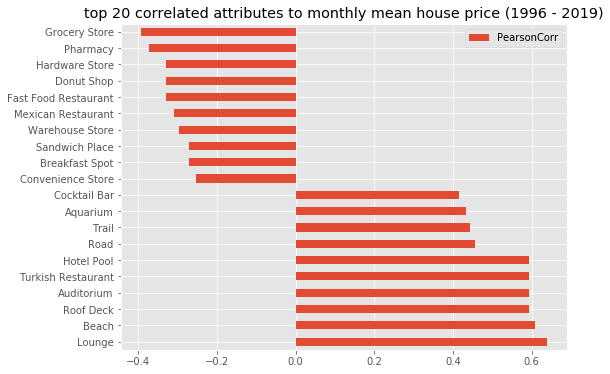

In [36]:
# visualize top10 correlations
df_corr_top10.plot(kind='barh', figsize=(8, 6))

plt.title('top 20 correlated attributes to monthly mean house price (1996 - 2019)')
#plt.ylabel('house price ($)')

plt.show()

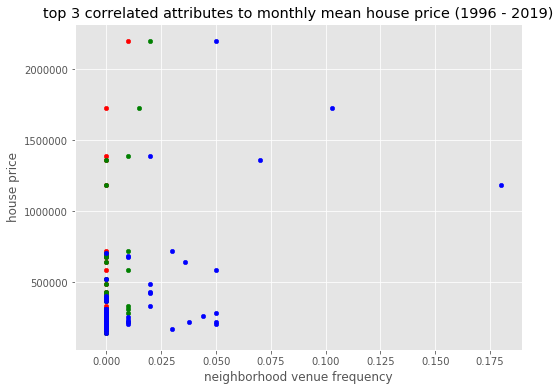

In [37]:
# visualize top positive and negative correlations
ax1 = df_venue_price.plot(kind='scatter', x='Turkish Restaurant', y='MonthlyMean',c='r', figsize =(8,6))
ax2 = df_venue_price.plot(kind='scatter', x='Lounge', y='MonthlyMean', color='g', ax=ax1)    
ax3 = df_venue_price.plot(kind='scatter', x='Beach', y='MonthlyMean', color='b', ax=ax1)

plt.title('top 3 correlated attributes to monthly mean house price (1996 - 2019)')
plt.ylabel('house price')
plt.xlabel('neighborhood venue frequency')

plt.show()

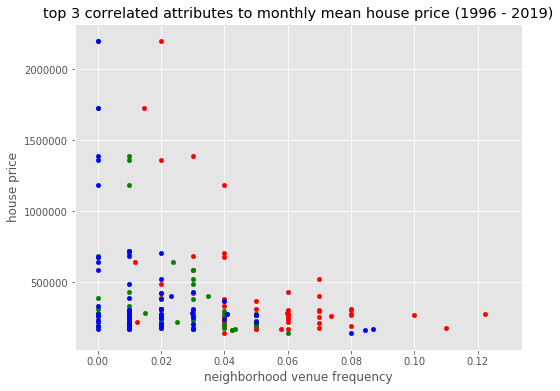

In [38]:
# visualize top negative and negative correlations
ax1 = df_venue_price.plot(kind='scatter', x='Grocery Store', y='MonthlyMean',c='r', figsize =(8,6))
ax2 = df_venue_price.plot(kind='scatter', x='Pharmacy', y='MonthlyMean', color='g', ax=ax1)    
ax3 = df_venue_price.plot(kind='scatter', x='Fast Food Restaurant', y='MonthlyMean', color='b', ax=ax1)

plt.title('top 3 correlated attributes to monthly mean house price (1996 - 2019)')
plt.ylabel('house price')
plt.xlabel('neighborhood venue frequency')

plt.show()

### Part 6: feature selection for linear regression
select features for linear regression

In [39]:
# select features per correlation
# find highly correlated features to target
importances = df_venue_price_norm.drop('MonthlyMean', axis=1).apply(lambda x: x.corr(df_venue_price_norm.MonthlyMean))
df_fea = pd.DataFrame(importances).rename({0:'coeff'},axis='columns')
df_fea_sel = df_fea[(abs(df_fea.coeff)>0.2)].reset_index()
df_fea_sel
fea_list = list(df_fea_sel['index'])
fea_list

['Aquarium',
 'Argentinian Restaurant',
 'Art Gallery',
 'Auditorium',
 'Beach',
 'Bed & Breakfast',
 'Beer Store',
 'Boat or Ferry',
 'Boutique',
 'Breakfast Spot',
 'Caribbean Restaurant',
 'Chocolate Shop',
 'Cocktail Bar',
 'College Academic Building',
 'Construction & Landscaping',
 'Convenience Store',
 'Cupcake Shop',
 'Discount Store',
 'Donut Shop',
 'Exhibit',
 'Fast Food Restaurant',
 'Fishing Spot',
 'Food Court',
 'French Restaurant',
 'Fried Chicken Joint',
 'Gas Station',
 'Gastropub',
 'Grocery Store',
 'Harbor / Marina',
 'Hardware Store',
 'History Museum',
 'Hotel',
 'Hotel Pool',
 'Indie Movie Theater',
 'Italian Restaurant',
 'Jazz Club',
 'Juice Bar',
 'Kosher Restaurant',
 'Latin American Restaurant',
 'Lighthouse',
 'Lounge',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Moving Target',
 'Neighborhood',
 'Nudist Beach',
 'Performing Arts Venue',
 'Peruvian Restaurant',
 'Pet Store',
 'Pharmacy',
 'Plaza',
 'Restaurant',
 'Road',
 'Roof Deck',
 'Sandwich 

In [40]:
# drop highly correlated features
df3b = df_venue_price_norm[fea_list]
print (df3b.info())
# Create correlation matrix
corr_matrix = df3b.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
to_drop
# Drop features 
df3c = df3b.drop(to_drop, axis=1)
print(df3c.info())
fea_sel_lst_corr = list(df3c.columns)
fea_sel_lst_corr

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, Hialeah,FL to Loxahatchee Groves,FL
Data columns (total 65 columns):
Aquarium                         70 non-null float64
Argentinian Restaurant           70 non-null float64
Art Gallery                      70 non-null float64
Auditorium                       70 non-null float64
Beach                            70 non-null float64
Bed & Breakfast                  70 non-null float64
Beer Store                       70 non-null float64
Boat or Ferry                    70 non-null float64
Boutique                         70 non-null float64
Breakfast Spot                   70 non-null float64
Caribbean Restaurant             70 non-null float64
Chocolate Shop                   70 non-null float64
Cocktail Bar                     70 non-null float64
College Academic Building        70 non-null float64
Construction & Landscaping       70 non-null float64
Convenience Store                70 non-null float64
Cupcake Shop              

['Aquarium',
 'Art Gallery',
 'Auditorium',
 'Beach',
 'Beer Store',
 'Boutique',
 'Breakfast Spot',
 'Caribbean Restaurant',
 'Chocolate Shop',
 'College Academic Building',
 'Convenience Store',
 'Cupcake Shop',
 'Discount Store',
 'Food Court',
 'French Restaurant',
 'Gastropub',
 'Grocery Store',
 'Hardware Store',
 'History Museum',
 'Italian Restaurant',
 'Juice Bar',
 'Latin American Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Peruvian Restaurant',
 'Restaurant',
 'South American Restaurant',
 'Sports Bar',
 'Tex-Mex Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Warehouse Store',
 'Wings Joint']

In [41]:
# select feature per mutual information
from sklearn.feature_selection import mutual_info_regression

In [42]:
# separate target from the variables
#df3_cln = df3.dropna()
X = df_venue_price_norm.drop(['MonthlyMean'],axis=1)
y = df_venue_price_norm['MonthlyMean']
# calculate mutual info
mi = mutual_info_regression(X, y)
mi_score = pd.Series(mi)
mi_score.index = X.columns
mi_score.sort_values(ascending=False)
# keep top 20 features
fea_list2 = pd.DataFrame({'mi_score':mi_score}).sort_values(by=['mi_score'], ascending=False)
fea_list_sel2 = fea_list2[0:20]
fea_sel_lst_mi = list(fea_list_sel2.index)
fea_sel_lst_mi

['Donut Shop',
 'Beach',
 'Hardware Store',
 'Grocery Store',
 'Greek Restaurant',
 'Golf Course',
 'Pet Store',
 'Italian Restaurant',
 'Gym',
 'Performing Arts Venue',
 'South American Restaurant',
 'Southern / Soul Food Restaurant',
 'Tapas Restaurant',
 'Lounge',
 'Cosmetics Shop',
 'Fried Chicken Joint',
 'Hotel',
 'Gastropub',
 'Seafood Restaurant',
 'Asian Restaurant']

In [43]:
# select feature per F score
from sklearn.feature_selection import f_regression

In [44]:
# calculate mutual info
fi = f_regression(X, y)
fi_score = pd.Series(fi)
df_fi = pd.DataFrame({'fi_score':fi_score[0]})
df_fi.index = X.columns
fea_list_fi = df_fi.sort_values(by=['fi_score'], ascending=False)
# keep top 20 features
fea_list_fi_sel2 = fea_list_fi[0:20]
fea_sel_lst_fi = list(fea_list_fi_sel2.index)
fea_sel_lst_fi

['Lounge',
 'Beach',
 'Hotel Pool',
 'Roof Deck',
 'Auditorium',
 'Turkish Restaurant',
 'Road',
 'Trail',
 'Aquarium',
 'Cocktail Bar',
 'State / Provincial Park',
 'Nudist Beach',
 'French Restaurant',
 'Hotel',
 'Italian Restaurant',
 'Boutique',
 'Moving Target',
 'Boat or Ferry',
 'Grocery Store',
 'Bed & Breakfast']

In [45]:
# merge 3 feature selection lists and use the most common ones
fea_sel_lst_comb = fea_sel_lst_corr + fea_sel_lst_mi + fea_sel_lst_fi
dict = {'fea':fea_sel_lst_comb}
df_fea_sel_lst_comb = pd.DataFrame(dict).reset_index()
df_fea_sel_lst_comb
df_fea_sel = df_fea_sel_lst_comb.groupby(['fea']).count().reset_index()
df_fea_sel_all = df_fea_sel[df_fea_sel['index'] >= 2]
fea_sel_lst_all = list(df_fea_sel_all['fea'])
fea_sel_lst_all

['Aquarium',
 'Auditorium',
 'Beach',
 'Boutique',
 'French Restaurant',
 'Gastropub',
 'Grocery Store',
 'Hardware Store',
 'Hotel',
 'Italian Restaurant',
 'Lounge',
 'South American Restaurant']

In [46]:
# generate dataset for regression analysis based on feature selected
df_reg = df_venue_price_norm[fea_sel_lst_all]
df_reg['MonthlyMean'] = df_venue_price_norm['MonthlyMean']
print(df_reg.info())
df_reg.head()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, Hialeah,FL to Loxahatchee Groves,FL
Data columns (total 13 columns):
Aquarium                     70 non-null float64
Auditorium                   70 non-null float64
Beach                        70 non-null float64
Boutique                     70 non-null float64
French Restaurant            70 non-null float64
Gastropub                    70 non-null float64
Grocery Store                70 non-null float64
Hardware Store               70 non-null float64
Hotel                        70 non-null float64
Italian Restaurant           70 non-null float64
Lounge                       70 non-null float64
South American Restaurant    70 non-null float64
MonthlyMean                  70 non-null float64
dtypes: float64(13)
memory usage: 7.7+ KB
None


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Aquarium,Auditorium,Beach,Boutique,French Restaurant,Gastropub,Grocery Store,Hardware Store,Hotel,Italian Restaurant,Lounge,South American Restaurant,MonthlyMean
Address,,,,,,,,,,,,,
"Hialeah,FL",0.0,0.0,0.000000,0.0,0.25,0.0,0.266788,1.0,0.000000,0.375,0.0,1.0,0.031174
"Country Club,FL",0.0,0.0,0.000000,0.0,0.00,0.0,0.266788,0.0,0.083333,0.500,0.0,1.0,0.049948
"Hollywood,FL",0.0,0.0,0.277778,0.0,0.00,0.5,0.177858,0.0,0.166667,0.125,0.5,0.5,0.215919
"Miramar,FL",0.0,0.0,0.000000,0.0,0.00,0.0,0.355717,0.5,0.166667,0.625,0.0,0.5,0.017681
"Pembroke Pines,FL",0.0,0.0,0.000000,0.0,0.00,0.0,0.533575,0.5,0.083333,0.250,0.0,0.0,0.053578


### Part 7: regression model
generate regression model using linear regression

In [122]:
# random split dataset
msk = np.random.rand(len(df_reg)) < 0.6
train = df_reg[msk]
test = df_reg[~msk]
print ("train info: ", train.info())
print ("test info: ", test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Country Club,FL to Tequesta,FL
Data columns (total 13 columns):
Aquarium                     42 non-null float64
Auditorium                   42 non-null float64
Beach                        42 non-null float64
Boutique                     42 non-null float64
French Restaurant            42 non-null float64
Gastropub                    42 non-null float64
Grocery Store                42 non-null float64
Hardware Store               42 non-null float64
Hotel                        42 non-null float64
Italian Restaurant           42 non-null float64
Lounge                       42 non-null float64
South American Restaurant    42 non-null float64
MonthlyMean                  42 non-null float64
dtypes: float64(13)
memory usage: 4.6+ KB
train info:  None
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Hialeah,FL to Loxahatchee Groves,FL
Data columns (total 13 columns):
Aquarium                     28 non-null float64
Auditor

In [123]:
# define variables and target
x = np.asanyarray(train[fea_sel_lst_all])
y = np.asanyarray(train[['MonthlyMean']])

In [124]:
# train linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 2.59971608e-01  1.11022302e-16  2.14596402e-01  1.58110346e-01
  -1.58698759e-01  1.39046292e-01 -6.65345653e-02 -3.95213396e-02
  -2.68914403e-02  1.87399966e-01  2.70474042e-01 -6.58612882e-02]]


In [125]:
# evaluate model performance
x_test = np.asanyarray(test[fea_sel_lst_all])
y_test = np.asanyarray(test[['MonthlyMean']])
y_hat = regr.predict(x_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 0.02
Variance score: 0.48


## IV Result
visualize the findings

In [138]:
# generate linear regression coefficient dataframe
regr_coeff = list(regr.coef_[0])
df_regr_coeff = pd.DataFrame({'fea':fea_sel_lst_all,'coeff':regr_coeff})
df_regr_coeff

,fea,coeff
0,Aquarium,2.599716e-01
1,Auditorium,1.110223e-16
2,Beach,2.145964e-01
3,Boutique,1.581103e-01
4,French Restaurant,-1.586988e-01
5,Gastropub,1.390463e-01
6,Grocery Store,-6.653457e-02
7,Hardware Store,-3.952134e-02
8,Hotel,-2.689144e-02
9,Italian Restaurant,1.874000e-01


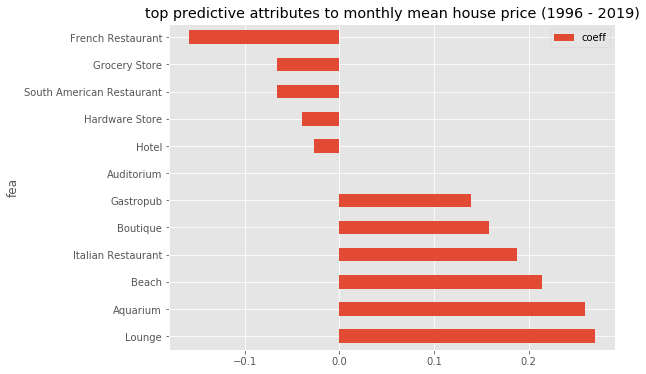

In [143]:
# visualize the coeff
df_regr_coeff_sort = df_regr_coeff.sort_values(by=['coeff'], ascending = False).set_index('fea')
df_regr_coeff_sort.plot(kind='barh', figsize=(8, 6))

plt.title('top predictive attributes to monthly mean house price (1996 - 2019)')
#plt.ylabel('house price ($)')

plt.show()

## V Discussion
- Lounge, Aquarium and Beach have the most positive predictive power to housing price. This means the higher is their compositions in a neighborhood, the higher is the average housing price 
- French Restaurants, Grocery Store, South American Restaurant and hardware store have the most negative predictive power. This means the higher is their compositions in a neighborhood, the lower is the average housing price
- Lower R2 means the venue composition is not the only housing price influential factor. As mentioned earlier, other factors such as school zones and crime rates also affect the housing price. A dataset that all the factors is expected to yield more accurate housing price prediction model 